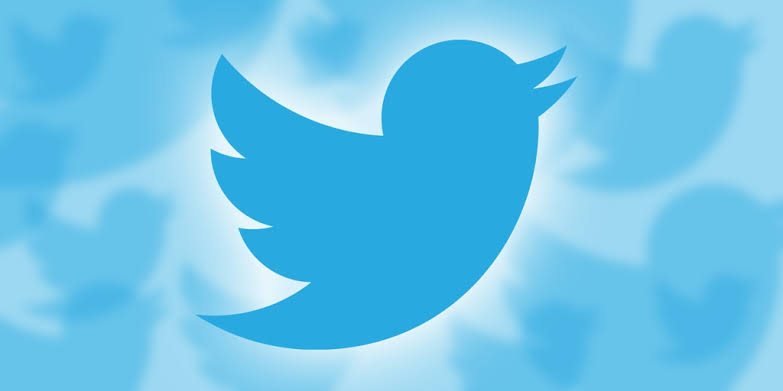

### Importing Libraries and loading data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-dark')

import re
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#Word cloud library
from wordcloud import WordCloud,STOPWORDS


#Machine Learning librairies

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

#Filter Warining Library
import warnings
warnings.filterwarnings('ignore')

##    1 - Data Exploration


### Upload Training DataSet

In [2]:
data_train = pd.read_csv('train.csv')
print('There are {} Rows and {} Columns in Train Dataset'.format(data_train.shape[0],data_train.shape[1]))
data_train.head()

There are 7613 Rows and 5 Columns in Train Dataset


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Target CountPlot of our DataSet

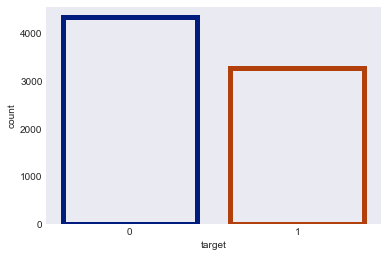

In [3]:
train_ax = sns.countplot(x="target",data=data_train,facecolor=(0,0,0,0),linewidth=5,
                        edgecolor=sns.color_palette("dark",3))

From our countplot we can see that there are more tweets that are considered  as not a disaster

And in our train table we have some missing values , so let's deal with it

## 2 - Data Processing

### 2.1 Missing Data

In [4]:
#Get total count of data including missing data
total_missing_data = data_train.isnull().sum().sort_values(ascending=False)

#Get pourcent of missing data relevant to all data
percent_missing_data = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing_data,percent_missing_data], axis=1, keys=['Total', 'Percent'])
missing_data.head(data_train.shape[1])

,Total,Percent
location,2533,0.332720
keyword,61,0.008013
id,0,0.000000
text,0,0.000000
target,0,0.000000


As we can see in table bellow almost **33%** of **Location** column is missing and very littel percentage of **Keyword** column is missing.

### 2.2 How to Handle Missing Data ?

#### Delete Location and Keywrord columns from my Tweet Dataset

In [5]:
#Delete Location and Keyword Columns
data_train = data_train.drop(['location','keyword'], axis=1)
print("Location and Keyword columns droped Successfully")

Location and Keyword columns droped Successfully


We will drop **id** column because it's not important to us

In [6]:
#Delete Id column from our dataset
data_train = data_train.drop('id',axis=1)
print("id column is droped Successfully")

id column is droped Successfully


## 3 - NLP Techniques

In [7]:
cleaned_data = []
pstem = PorterStemmer()
for i in range(data_train['text'].shape[0]):
    #Remove unwanted words
    tweet = re.sub("[^a-zA-Z]", ' ', data_train['text'][i])
    #Transform words to lowercase
    tweet = tweet.lower()
    tweet = tweet.split()
    #Remove stopwords then Stemming it
    tweet = [pstem.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    #Append cleaned tweet
    cleaned_data.append(tweet)

In [8]:
print("Cleaned Data : ")
print(pd.DataFrame(cleaned_data)[0].head(10))

Cleaned Data : 
0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
5    rockyfir updat california hwi close direct due...
6    flood disast heavi rain caus flash flood stree...
7                               top hill see fire wood
8               emerg evacu happen build across street
9                             afraid tornado come area
Name: 0, dtype: object


In [9]:
raw_text_data_1 = data_train['text']
clean_text_data = pd.DataFrame(cleaned_data,columns=['text_after_cleaning'])
raw_text_data_2 = data_train['target']

frames = [raw_text_data_1,clean_text_data,raw_text_data_2]
result = pd.concat(frames,axis=1,sort=False)
result

,text,text_after_cleaning,target
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada,1
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...,1
3,"13,000 people receive #wildfires evacuation or...",peopl receiv wildfir evacu order california,1
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant crane hold bridg collaps nearbi home...,1
7609,@aria_ahrary @TheTawniest The out of control w...,aria ahrari thetawniest control wild fire cali...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,utc km volcano hawaii http co zdtoyd ebj,1
7611,Police investigating after an e-bike collided ...,polic investig e bike collid car littl portug ...,1


### Add text word count

#### count the number of word in my cleaned dataset

In [10]:
result['clean_text_word_count'] = result['text_after_cleaning'].apply(lambda x : len(x.split()))

### Add unique word count

#### count the number of unique word in my cleaned dataset

In [11]:
result['clean_unique_words'] = result['text_after_cleaning'].apply(lambda x: len(set(x.split())))

### Add Stopwords count

#### count the number of stopwords in my cleaned dataset

In [12]:
s = stopwords.words('english')
result['stopwords_count'] = result['text'].apply(lambda x: len([i for i in x.lower().split() if i in s]))

### Add url count

#### count the number of url in my cleaned dataset

In [13]:
result['url_count'] = result['text'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

### Add hashtag count

#### count the number of hashtags in my cleaned dataset

In [14]:
result['hashtag_count'] = result['text'].apply(lambda x: len([i for i in str(x) if i == '#'])) 

### Add penctuation count

#### count the number of penctuations in my cleaned dataset

In [15]:
result['penctuation_count'] = result['text'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

### Create a column for the number of characters in a tweet

#### count the number of characters in my cleaned dataset of tweet

In [16]:
result['clean_text_characters_count'] = result['text_after_cleaning'].apply(lambda x:len(x))

### Create a function (average_word_length) to find average words length

In [17]:
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

### Broadcast to text column 

In [18]:
result['clean_average_word_length'] = result['text_after_cleaning'].apply(average_word_length)

### show my final dataset

In [19]:
result.head()

,text,text_after_cleaning,target,clean_text_word_count,clean_unique_words,stopwords_count,url_count,hashtag_count,penctuation_count,clean_text_characters_count,clean_average_word_length
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us,1,7,7,6,0,1,1,41,5.000000
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada,1,7,7,0,0,0,1,36,4.285714
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...,1,11,9,11,0,0,3,69,5.363636
3,"13,000 people receive #wildfires evacuation or...",peopl receiv wildfir evacu order california,1,6,6,1,0,1,2,43,6.333333
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...,1,9,9,7,0,2,2,52,4.888889


## 5 - Data Visualization

### Clean the average word length count

Text(0.5, 1.0, 'Distribution of clean tweet average word length')

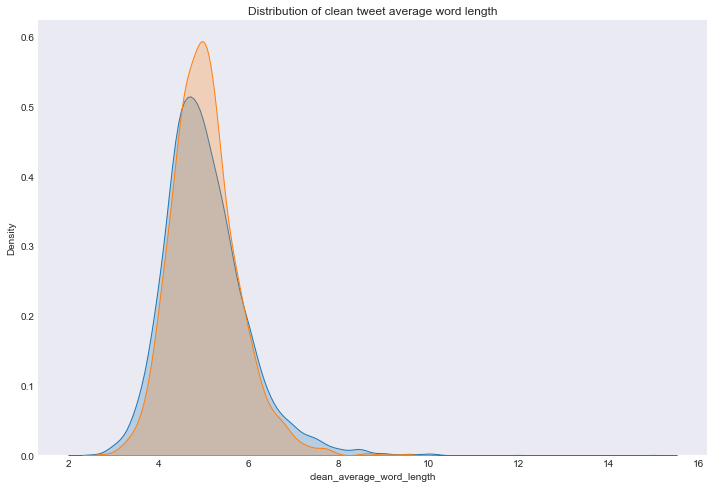

In [21]:
fig,ax = plt.subplots(figsize = (12,8))
sns.kdeplot(result['clean_average_word_length'][result['target'] == 0],shade=True,label = 'Not disaster tweet')
sns.kdeplot(result['clean_average_word_length'][result['target'] == 1],shade=True,label = 'Disaster tweet')
plt.title('Distribution of clean tweet average word length')

### Clean text characters count

Text(0.5, 1.0, 'Distribution of clean text tweet characters count')

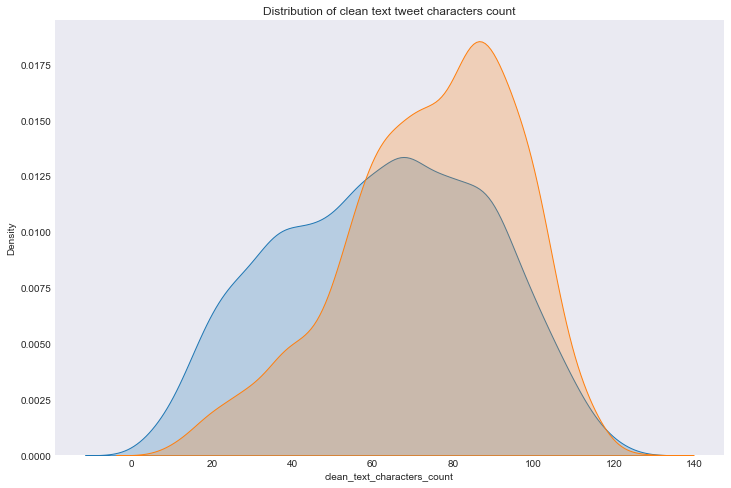

In [22]:
fig,ax = plt.subplots(figsize = (12,8))
sns.kdeplot(result['clean_text_characters_count'][result['target'] == 0],shade=True,label = 'Not disaster tweet')
sns.kdeplot(result['clean_text_characters_count'][result['target'] == 1],shade=True,label = 'Disaster tweet')
plt.title('Distribution of clean text tweet characters count')

### Clean text unique words count

Text(0.5, 1.0, 'Distribution of unique words in cleaned tweet dataset')

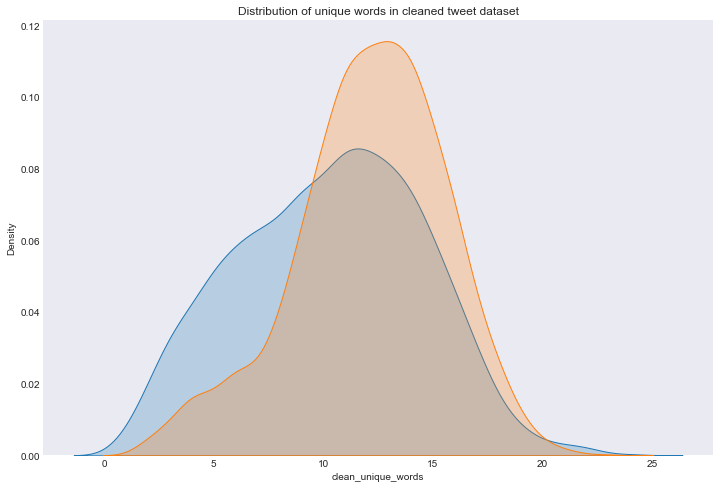

In [23]:
fig,ax = plt.subplots(figsize = (12,8))
sns.kdeplot(result['clean_unique_words'][result['target'] == 0],shade=True,label = 'Not disaster tweet')
sns.kdeplot(result['clean_unique_words'][result['target'] == 1],shade=True,label = 'Disaster tweet')
plt.title('Distribution of unique words in cleaned tweet dataset')

### Unclean text stop word count

Text(0.5, 1.0, 'Distribution of uncleaned text stop word count')

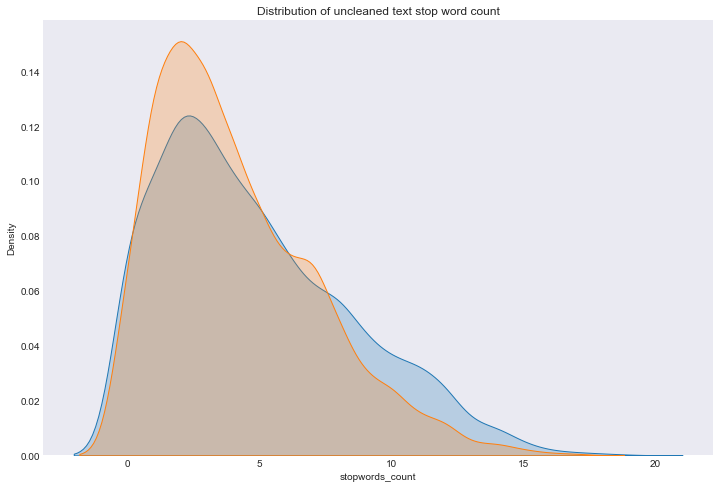

In [24]:
fig,ax = plt.subplots(figsize = (12,8))
sns.kdeplot(result['stopwords_count'][result['target'] == 0],shade=True,label = 'Not disaster tweet')
sns.kdeplot(result['stopwords_count'][result['target'] == 1],shade=True,label = 'Disaster tweet')
plt.title('Distribution of uncleaned text stop word count')

### URL count in cleaned Tweet dataset

Text(0.5, 1.0, 'Distribution of URL count in cleaned tweet dataset')

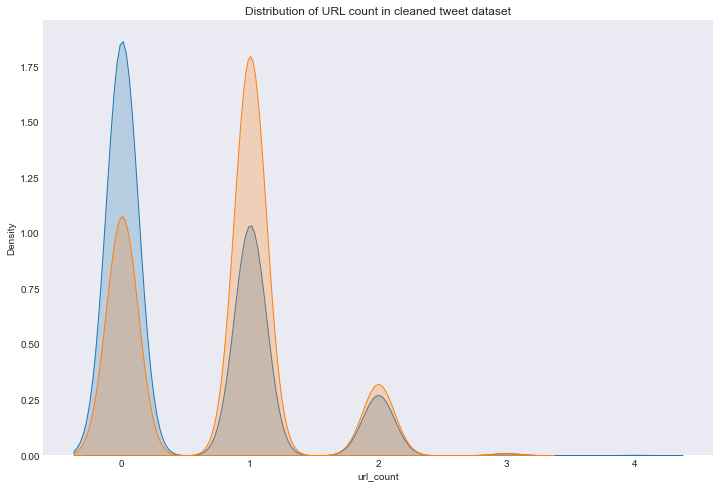

In [25]:
fig,ax = plt.subplots(figsize = (12,8))
sns.kdeplot(result['url_count'][result['target'] == 0],shade=True,label = 'Not disaster tweet')
sns.kdeplot(result['url_count'][result['target'] == 1],shade=True,label = 'Disaster tweet')
plt.title('Distribution of URL count in cleaned tweet dataset')

### Penctuation count in cleaned Tweet dataset

Text(0.5, 1.0, 'Distribution Penctuations count in cleaned Tweet dataset')

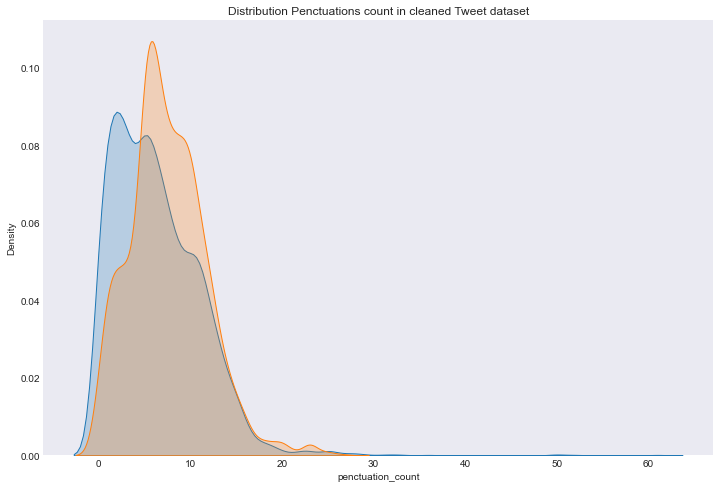

In [26]:
fig,ax = plt.subplots(figsize = (12,8))
sns.kdeplot(result['penctuation_count'][result['target'] == 0],shade=True,label = 'Not disaster tweet')
sns.kdeplot(result['penctuation_count'][result['target'] == 1],shade=True,label = 'Disaster tweet')
plt.title('Distribution Penctuations count in cleaned Tweet dataset')

## 6 - Vectorization

In [27]:
uniqueWordFrequents = {}
for tweet in cleaned_data:
    for word in tweet.split():
        if(word in uniqueWordFrequents.keys()):
            uniqueWordFrequents[word] += 1
        else:
            uniqueWordFrequents[word] = 1

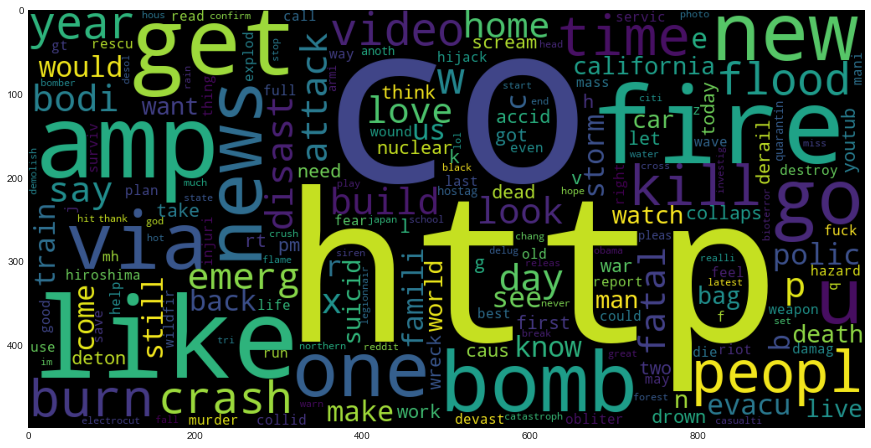

In [28]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(uniqueWordFrequents)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [29]:
uniqueWordFrequents = pd.DataFrame.from_dict(uniqueWordFrequents,orient='index',columns=['Word Frequent'])
uniqueWordFrequents.sort_values(by=['Word Frequent'], inplace=True, ascending=False)
uniqueWordFrequents.head(10)

,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
get,311
bomb,239
new,228
via,220
u,216


In [30]:
uniqueWordFrequents['Word Frequent'].unique()

array([4746, 4721,  411,  363,  344,  311,  239,  228,  220,  216,  213,
        210,  209,  201,  183,  181,  180,  178,  175,  169,  166,  164,
        162,  156,  155,  153,  151,  145,  144,  143,  137,  133,  132,
        131,  130,  129,  128,  125,  124,  123,  122,  121,  120,  119,
        118,  117,  116,  114,  111,  110,  109,  108,  106,  105,  104,
        103,  102,  101,  100,   99,   98,   97,   96,   95,   94,   93,
         91,   90,   89,   88,   87,   86,   84,   83,   82,   79,   78,
         77,   76,   75,   74,   73,   72,   71,   70,   69,   68,   67,
         66,   65,   64,   63,   62,   61,   60,   59,   58,   57,   56,
         55,   54,   53,   52,   51,   50,   49,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   39,   38,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,   

In [31]:
uniqueWordFrequents = uniqueWordFrequents[uniqueWordFrequents['Word Frequent']>=20]
print(uniqueWordFrequents.shape)
uniqueWordFrequents

(787, 1)


,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
...,...
cnn,20
gem,20
captur,20
arriv,20


### Create sparse matrix ( Bag of words )

***Bag of words*** contain only unique words in our cleaned dataset

In [32]:
counVec = CountVectorizer(max_features = uniqueWordFrequents.shape[0])
bagOfWords = counVec.fit_transform(cleaned_data).toarray()

In [33]:
bagOfWords.shape

(7613, 787)

In [34]:
Vec_Tex_Data = pd.DataFrame(bagOfWords)
frames_1 = [result, Vec_Tex_Data]
result_final = pd.concat(frames_1, axis=1, sort=False)

In [35]:
result_final

,text,text_after_cleaning,target,clean_text_word_count,clean_unique_words,stopwords_count,url_count,hashtag_count,penctuation_count,clean_text_characters_count,...,777,778,779,780,781,782,783,784,785,786
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us,1,7,7,6,0,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada,1,7,7,0,0,0,1,36,...,0,0,0,0,0,0,0,0,0,0
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...,1,11,9,11,0,0,3,69,...,0,0,0,0,0,0,0,0,0,0
3,"13,000 people receive #wildfires evacuation or...",peopl receiv wildfir evacu order california,1,6,6,1,0,1,2,43,...,0,0,0,0,0,0,0,0,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...,1,9,9,7,0,2,2,52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant crane hold bridg collaps nearbi home...,1,11,11,2,1,0,5,64,...,0,0,0,0,0,0,0,0,0,0
7609,@aria_ahrary @TheTawniest The out of control w...,aria ahrari thetawniest control wild fire cali...,1,12,12,9,0,0,5,84,...,0,0,0,0,0,0,0,0,0,0
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,utc km volcano hawaii http co zdtoyd ebj,1,8,8,2,1,0,11,40,...,0,0,0,0,0,0,0,0,0,0
7611,Police investigating after an e-bike collided ...,polic investig e bike collid car littl portug ...,1,17,15,5,0,0,5,97,...,0,0,0,0,0,0,0,0,0,0


In [36]:
result_final = result_final.drop(['text','text_after_cleaning'], axis=1)
print("text and text_after_cleaning columns droped successfully")

text and text_after_cleaning columns droped successfully


***Display final result of data after cleaning***

In [37]:
result_final.head()

,target,clean_text_word_count,clean_unique_words,stopwords_count,url_count,hashtag_count,penctuation_count,clean_text_characters_count,clean_average_word_length,0,...,777,778,779,780,781,782,783,784,785,786
0,1,7,7,6,0,1,1,41,5.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,7,0,0,0,1,36,4.285714,0,...,0,0,0,0,0,0,0,0,0,0
2,1,11,9,11,0,0,3,69,5.363636,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,6,1,0,1,2,43,6.333333,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9,9,7,0,2,2,52,4.888889,0,...,0,0,0,0,0,0,0,0,0,0


## 7 - Building Models

Now we will build our models , we will use the following models :
- ***Logistic Regression Model***
- ***Gaussian Naive Bayes Model***
- ***K - Nearest Neighbors Model***
- ***SVM Model***

Before using it we will split our data to ***Train*** and ***Test*** set first

In [38]:
X = result_final.drop(['target'],axis=1)
Y = result_final['target']

print("X shape = ",X.shape)
print("Y shape = ",Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=55, shuffle =True)
print('Data splitting successfully')

X shape =  (7613, 795)
Y shape =  (7613,)
Data splitting successfully


### 7.1 - Logistic Regression Model

***Logistic regression*** is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on

In [39]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(penalty='l2', 
                                        solver='saga', 
                                        random_state = 55)  

LogisticRegression.fit(X_train,Y_train)

print("LogisticRegression Classifier model run successfully")

LogisticRegression Classifier model run successfully


### 7.2 - Gaussian Naive Bayes Model

***Naive Bayes*** are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier.

In [40]:
gaussianNBModel = GaussianNB()
gaussianNBModel.fit(X_train,Y_train)
print("GaussianNB model run successfully")

GaussianNB model run successfully


### 7.3 - K - Nearest Neighbors Model

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [41]:
KNeighborsModel = KNeighborsClassifier(n_neighbors = 7,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(X_train,Y_train)

print("KNeighbors Classifier model run successfully")

KNeighbors Classifier model run successfully


### 7.4 - SVM Model

The goal of the ***SVM algorithm*** is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [45]:
from sklearn.svm import SVC
SVM_Model = SVC(kernel='linear', random_state=0)  
SVM_Model.fit(X_train, Y_train) 
print("SVM Classifier model run successfully")

SVM Classifier model run successfully


## 8 - Models Evaluation

Now we will evaluate our model using ***f1_score.***

- ***Evaluation Details***

In [46]:
models = [LogisticRegression,gaussianNBModel,KNeighborsModel,SVM_Model]

for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_train, Y_train))
    print(type(model).__name__,' Test Score is    : ' ,model.score(X_test, Y_test))
    
    Y_pred = model.predict(X_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(Y_test,Y_pred))
    print('--------------------------------------------------------------------------')

LogisticRegression  Train Score is   :  0.7518883415435139
LogisticRegression  Test Score is    :  0.7334208798424163
LogisticRegression  F1 Score is      :  0.6451048951048952
--------------------------------------------------------------------------
GaussianNB  Train Score is   :  0.7985221674876847
GaussianNB  Test Score is    :  0.7609980302035456
GaussianNB  F1 Score is      :  0.680701754385965
--------------------------------------------------------------------------
KNeighborsClassifier  Train Score is   :  0.9949096880131363
KNeighborsClassifier  Test Score is    :  0.6513460275771503
KNeighborsClassifier  F1 Score is      :  0.5410544511668108
--------------------------------------------------------------------------
SVC  Train Score is   :  0.8568144499178982
SVC  Test Score is    :  0.7767564018384767
SVC  F1 Score is      :  0.7203947368421052
--------------------------------------------------------------------------
